In [1]:
dataset = read.csv('Social_Network_Ads.csv', sep = ',', header = TRUE)
head(dataset)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [2]:
dataset = dataset[, 3:5]
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [3]:
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)


In [4]:
#Feature Scaling
training_set[, 1:2] = scale(training_set[, 1:2])
test_set[, 1:2] = scale(test_set[, 1:2])


In [5]:
#Fitting Logistic Regression to the Training Set
classifier = glm(formula = Purchased ~ ., family = binomial, 
                 data = training_set )
classifier


Call:  glm(formula = Purchased ~ ., family = binomial, data = training_set)

Coefficients:
    (Intercept)              Age  EstimatedSalary  
         -1.192            2.632            1.395  

Degrees of Freedom: 299 Total (i.e. Null);  297 Residual
Null Deviance:	    390.9 
Residual Deviance: 199.8 	AIC: 205.8

In [6]:
#Predicting the Test set results
prob_pred = predict(classifier, type = 'response', newdata = test_set[-3])

In [7]:
print(prob_pred)

           2            4            5            9           12           18 
0.0162395375 0.0117148379 0.0037846461 0.0024527456 0.0073339436 0.2061576580 
          19           20           22           29           32           34 
0.2669935073 0.3851475689 0.5448578778 0.0103005636 0.2994922143 0.0084168787 
          35           38           45           46           48           52 
0.0494471952 0.0171641479 0.0485051303 0.0008343060 0.0102561619 0.0007055347 
          66           69           74           75           82           84 
0.0058448457 0.0044534947 0.3933468488 0.0071065671 0.1068589185 0.2580084947 
          85           86           87           89          103          104 
0.0303248927 0.3303649169 0.0051132916 0.0263861849 0.1310148056 0.7649772313 
         107          108          109          117          124          126 
0.0034367786 0.0473827096 0.0327965105 0.1626049288 0.0675494054 0.2189658514 
         127          131          134          139 

In [8]:
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [9]:
#Making  the Confusion matrix
cm = table(test_set[,3], y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 10 26

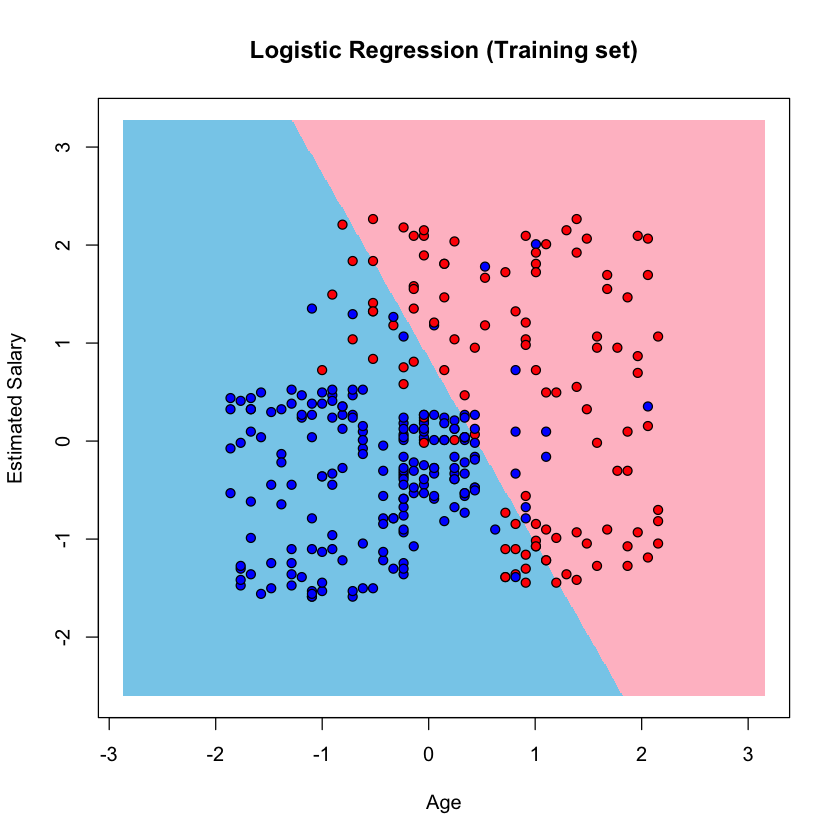

In [12]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'pink', 'skyblue'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'red', 'blue'))


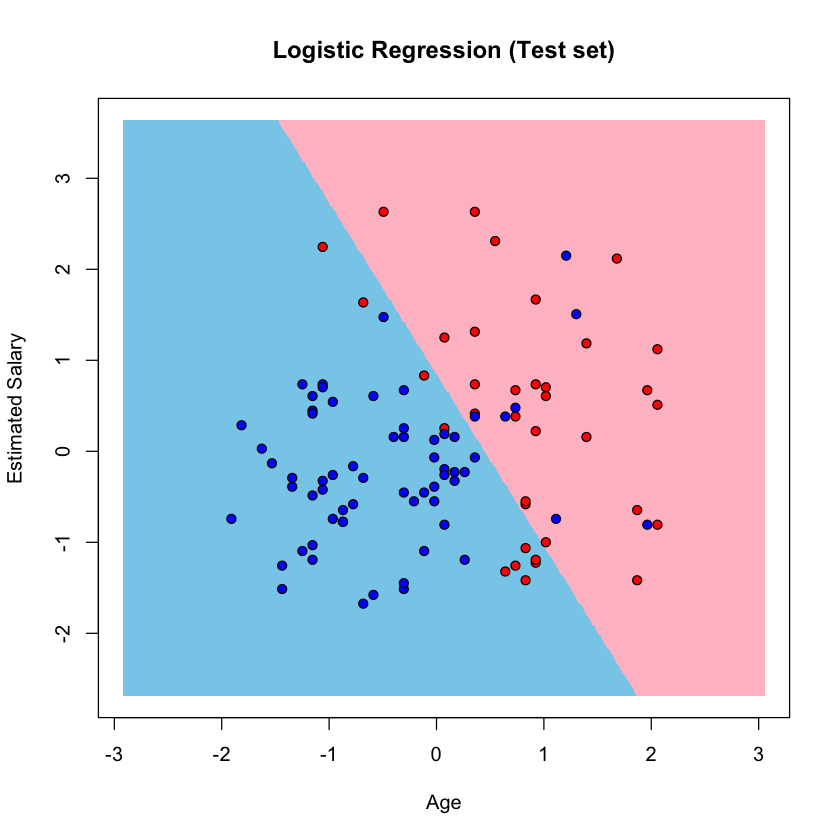

In [13]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'pink', 'skyblue'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'red', 'blue'))